In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv("Customer-Churn.csv")
data.drop(columns=["customerID"], inplace=True)

In [4]:
print(data.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2    Male              0      No         No       2          Yes                No             DSL            Yes          Yes               No          No        

In [5]:
data = data.replace(" ", pd.NA)

In [6]:
data.shape

(7043, 20)

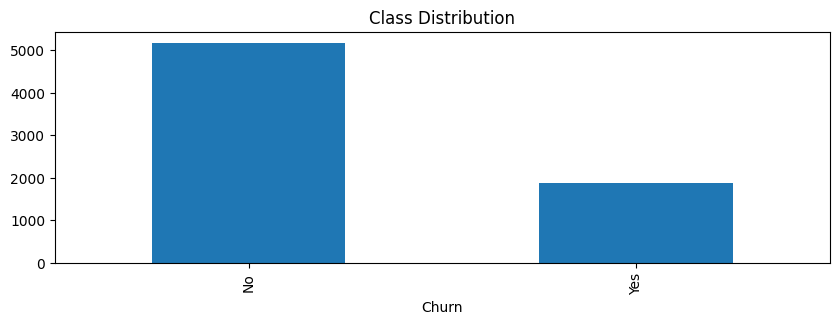

In [7]:
data['Churn'].value_counts().plot(kind="bar", figsize=(10,3))
plt.title("Class Distribution")
plt.show()

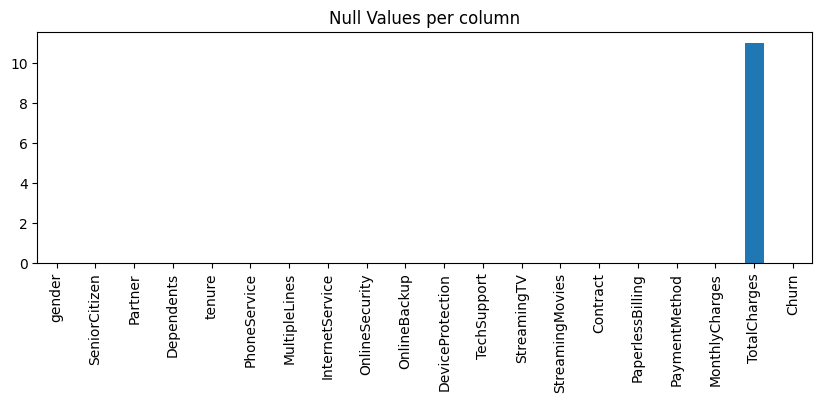

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
data.isnull().sum().plot(kind="bar", figsize=(10,3))
plt.title("Null Values per column")
plt.show()

data.isnull().sum()

In [9]:
data.dropna(inplace=True)

In [10]:
data.duplicated().sum()

np.int64(22)

In [11]:
data['SeniorCitizen'] = data['SeniorCitizen'].apply(lambda x : True if x == 1 else False)
data["SeniorCitizen"] = data["SeniorCitizen"].astype(object)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [12]:
cat_col = data.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_col)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
num_col = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_col)

['tenure', 'MonthlyCharges', 'TotalCharges']


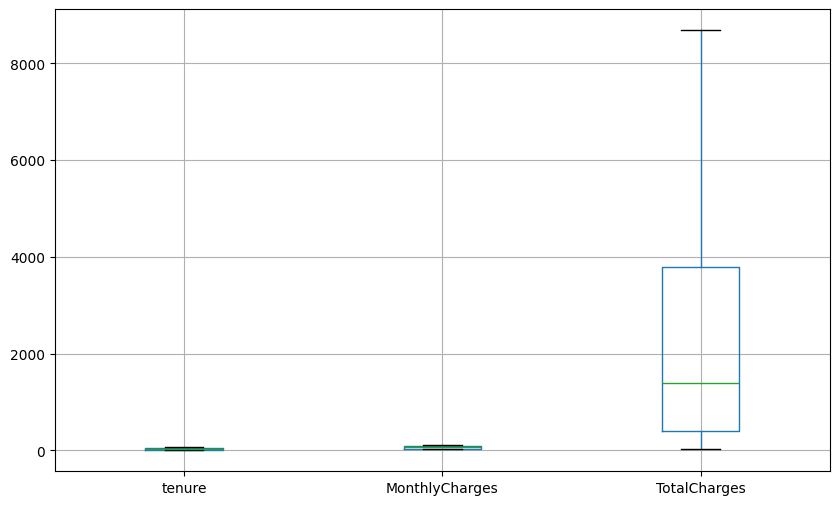

In [14]:
data.boxplot(figsize=(10,6))
plt.show()

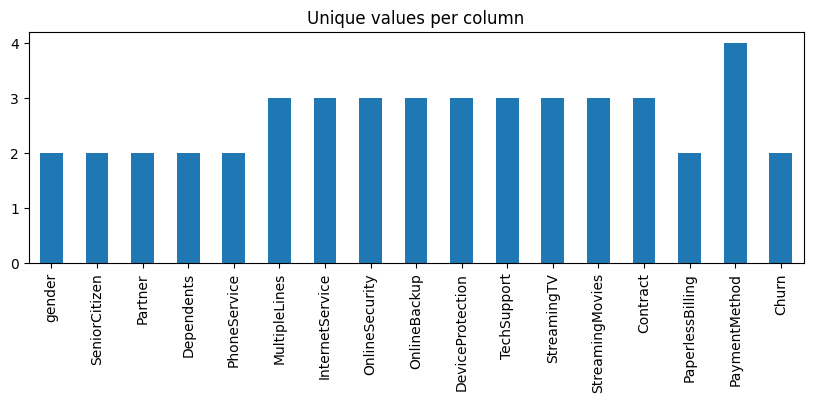

In [15]:
data[cat_col].nunique().plot(kind="bar", figsize=(10,3))
plt.title("Unique values per column")
plt.show()

In [27]:
for col in data.columns:
    if data[col].dtype != 'int64' and data[col].dtype != 'float64':
        print(f'{col} : {data[col].unique()}')

MultipleLines_No phone service : [ True False]
MultipleLines_Yes : [False  True]
InternetService_Fiber optic : [False  True]
InternetService_No : [False  True]
OnlineSecurity_No internet service : [False  True]
OnlineSecurity_Yes : [False  True]
OnlineBackup_No internet service : [False  True]
OnlineBackup_Yes : [ True False]
DeviceProtection_No internet service : [False  True]
DeviceProtection_Yes : [False  True]
TechSupport_No internet service : [False  True]
TechSupport_Yes : [False  True]
StreamingTV_No internet service : [False  True]
StreamingTV_Yes : [False  True]
StreamingMovies_No internet service : [False  True]
StreamingMovies_Yes : [False  True]
Contract_One year : [False  True]
Contract_Two year : [False  True]
PaymentMethod_Credit card (automatic) : [False  True]
PaymentMethod_Electronic check : [ True False]
PaymentMethod_Mailed check : [False  True]


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols_le = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in cols_le:
    data[col] = le.fit_transform(data[col])


In [17]:
cols_one_hot = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

data = pd.get_dummies(data, columns=cols_one_hot, drop_first=True)


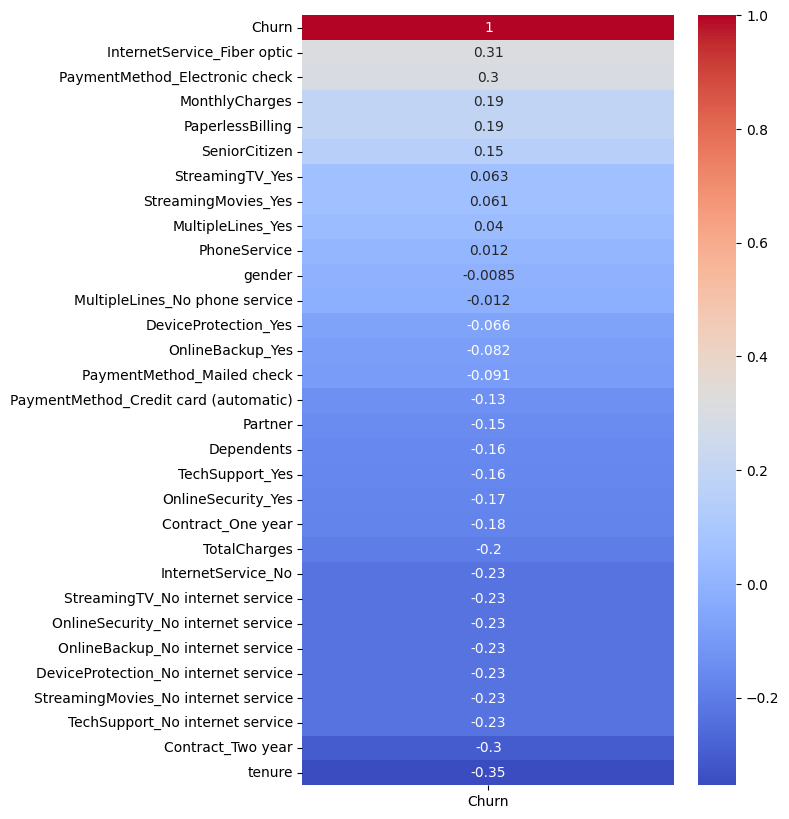

In [18]:
corr = data.corr() 

plt.figure(figsize=(6,10))
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), 
            annot=True, cmap="coolwarm")
plt.show()


In [19]:
churn_corr = dict(corr[['Churn']].sort_values(by='Churn', ascending=False))
churn_corr = dict(churn_corr['Churn'])

In [20]:
threshold = 0.1
high_impact_features = [f for f, corr_val in churn_corr.items() if abs(corr_val) > threshold]
high_impact_features.remove("Churn")

high_impact_features


['InternetService_Fiber optic',
 'PaymentMethod_Electronic check',
 'MonthlyCharges',
 'PaperlessBilling',
 'SeniorCitizen',
 'PaymentMethod_Credit card (automatic)',
 'Partner',
 'Dependents',
 'TechSupport_Yes',
 'OnlineSecurity_Yes',
 'Contract_One year',
 'TotalCharges',
 'InternetService_No',
 'StreamingTV_No internet service',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'StreamingMovies_No internet service',
 'TechSupport_No internet service',
 'Contract_Two year',
 'tenure']

In [21]:
X = data.drop(columns=['Churn'])
y = data['Churn']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y,)

In [23]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced',max_depth = 10)    

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)




In [24]:
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report, accuracy_score

bal_acc = balanced_accuracy_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
class_rep_rf = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"Macro F1-score:   {macro_f1:.4f}")
print("\nClassification Report:\n", class_rep_rf)


Accuracy: 0.7682
Balanced Accuracy: 0.7529
Macro F1-score:   0.7278

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.83      1549
           1       0.55      0.72      0.62       561

    accuracy                           0.77      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.80      0.77      0.78      2110



In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# pipeline
from sklearn.pipeline import Pipeline

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy,"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy, "%")

Model: Random Forest
Test Accuracy: 0.7924170616113744 %

Model: Gradient Boosting
Test Accuracy: 0.7895734597156399 %

Model: Support Vector Machine
Test Accuracy: 0.7251184834123223 %

Model: Logistic Regression
Test Accuracy: 0.7345971563981043 %

Model: K-Nearest Neighbors
Test Accuracy: 0.7592417061611374 %

Model: Decision Tree
Test Accuracy: 0.75260663507109 %

Model: Ada Boost
Test Accuracy: 0.7938388625592417 %

Model: XG Boost
Test Accuracy: 0.795260663507109 %

Model: Naive Bayes
Test Accuracy: 0.6454976303317536 %

Best Model:
Test Accuracy: 0.795260663507109
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=Fals

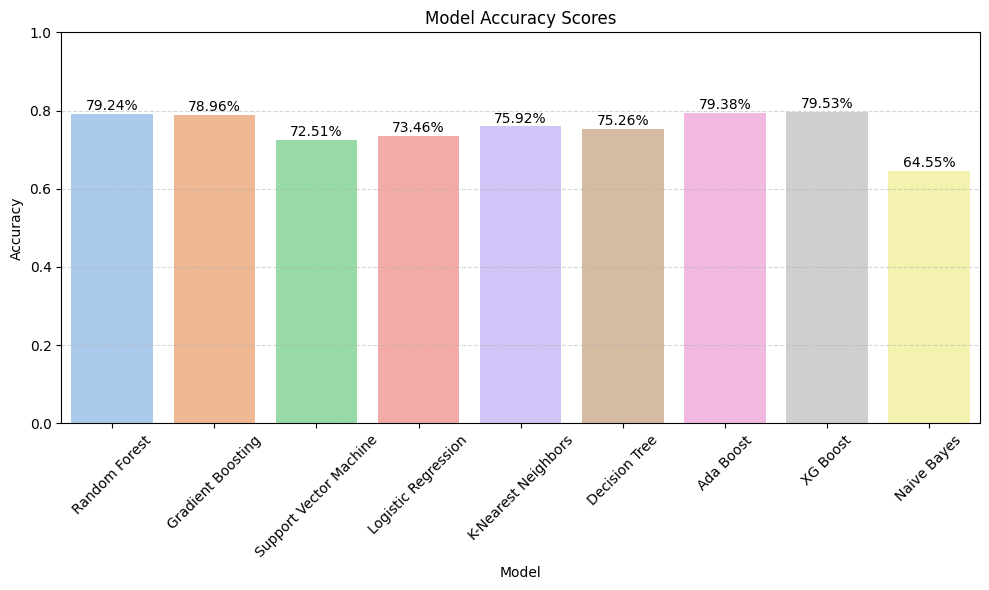

In [34]:
# Define a color palette for the bars
plt.figure(figsize=(10, 6))

# Simple pastel barplot
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette='pastel')

# Add labels on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 0.01, 
            f"{p.get_height():.2%}", ha='center')

# Formatting
plt.title("Model Accuracy Scores")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)   # accuracy between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)


In [37]:
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    yr_pred = pipeline.predict(Xr_test)

    # Calculate accuracy score
    accuracy = accuracy_score(yr_test, yr_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy,"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy, "%")

Model: Random Forest
Test Accuracy: 0.9463667820069204 %

Model: Gradient Boosting
Test Accuracy: 0.9377162629757786 %

Model: Support Vector Machine
Test Accuracy: 0.9204152249134948 %

Model: Logistic Regression
Test Accuracy: 0.9083044982698962 %

Model: K-Nearest Neighbors
Test Accuracy: 0.9134948096885813 %

Model: Decision Tree
Test Accuracy: 0.9394463667820069 %

Model: Ada Boost
Test Accuracy: 0.9186851211072664 %

Model: XG Boost
Test Accuracy: 0.9359861591695502 %

Model: Naive Bayes
Test Accuracy: 0.8598615916955017 %

Best Model:
Test Accuracy: 0.9463667820069204
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, random_state=42))]) with accuracy 0.9463667820069204 %


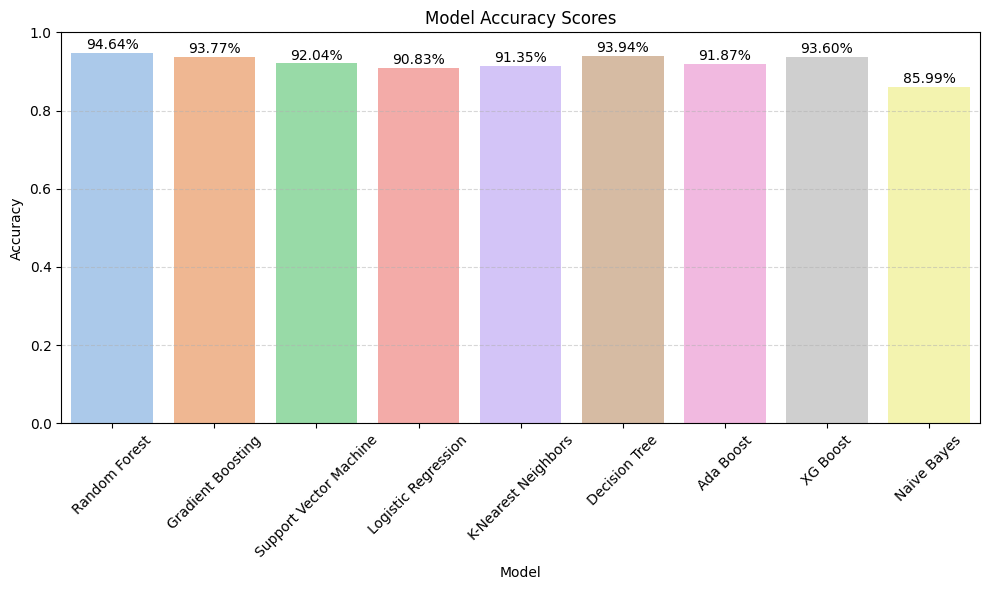

In [38]:
# Define a color palette for the bars
plt.figure(figsize=(10, 6))

# Simple pastel barplot
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette='pastel')

# Add labels on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 0.01, 
            f"{p.get_height():.2%}", ha='center')

# Formatting
plt.title("Model Accuracy Scores")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)   # accuracy between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()